In [2]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset, info = tfds.load("eurosat", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Abdallah Adel\tensorflow_datasets\eurosat\rgb\incomplete.3YPY6C_2.0.0\eurosat-train.tfrecor…

Dataset eurosat downloaded and prepared to C:\Users\Abdallah Adel\tensorflow_datasets\eurosat\rgb\2.0.0. Subsequent calls will reuse this data.


In [4]:
classes= info.features['label'].names
classes

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [5]:
n_classes = len(classes)
n_classes

10

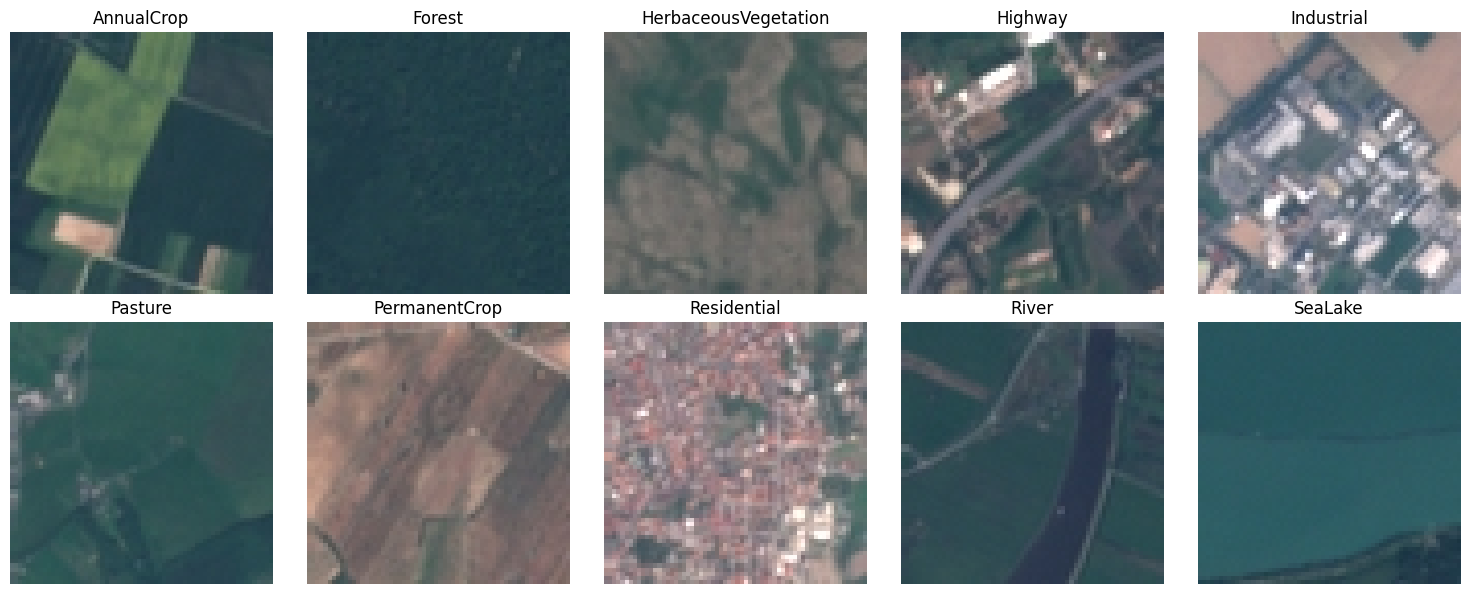

In [6]:
# Showing the first image in each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, label in enumerate(classes):
    for img, lbl in dataset["train"].take(500):
      if lbl.numpy() == i:
        ax = axes[i // 5, i % 5]
        ax.imshow(img)
        ax.set_title(label)
        ax.axis("off")
        break
plt.tight_layout()
plt.show()

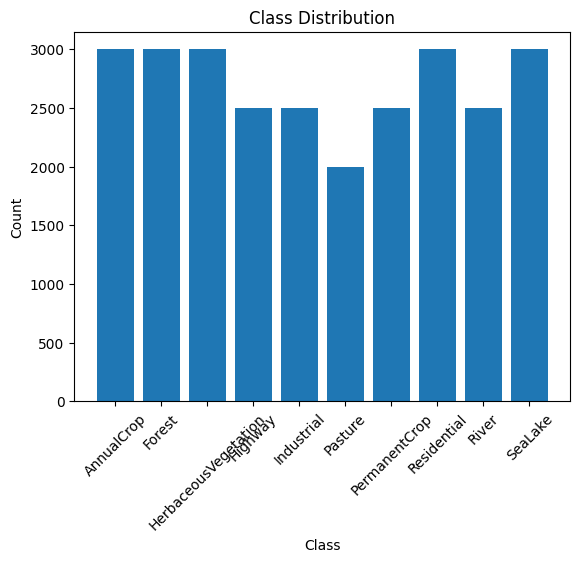

In [7]:
# Bar plot showing class distribution
counts = np.zeros(n_classes)
for img, lbl in dataset["train"]:
  counts[lbl.numpy()] += 1
plt.bar(classes, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()

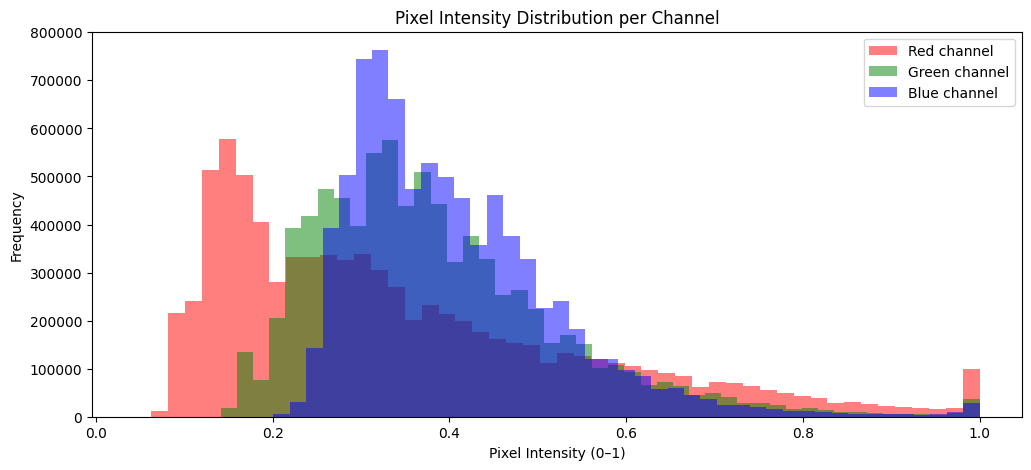

In [8]:
pixels_R, pixels_G, pixels_B = [], [], []

for img, _ in dataset['train'].take(2000):
    img = img.numpy() / 255.0
    pixels_R.extend(img[:,:,0].flatten())
    pixels_G.extend(img[:,:,1].flatten())
    pixels_B.extend(img[:,:,2].flatten())

pixels_R = np.array(pixels_R)
pixels_G = np.array(pixels_G)
pixels_B = np.array(pixels_B)

plt.figure(figsize=(12,5))
plt.hist(pixels_R, bins=50, color='r', alpha=0.5, label='Red channel')
plt.hist(pixels_G, bins=50, color='g', alpha=0.5, label='Green channel')
plt.hist(pixels_B, bins=50, color='b', alpha=0.5, label='Blue channel')
plt.title("Pixel Intensity Distribution per Channel")
plt.xlabel("Pixel Intensity (0–1)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

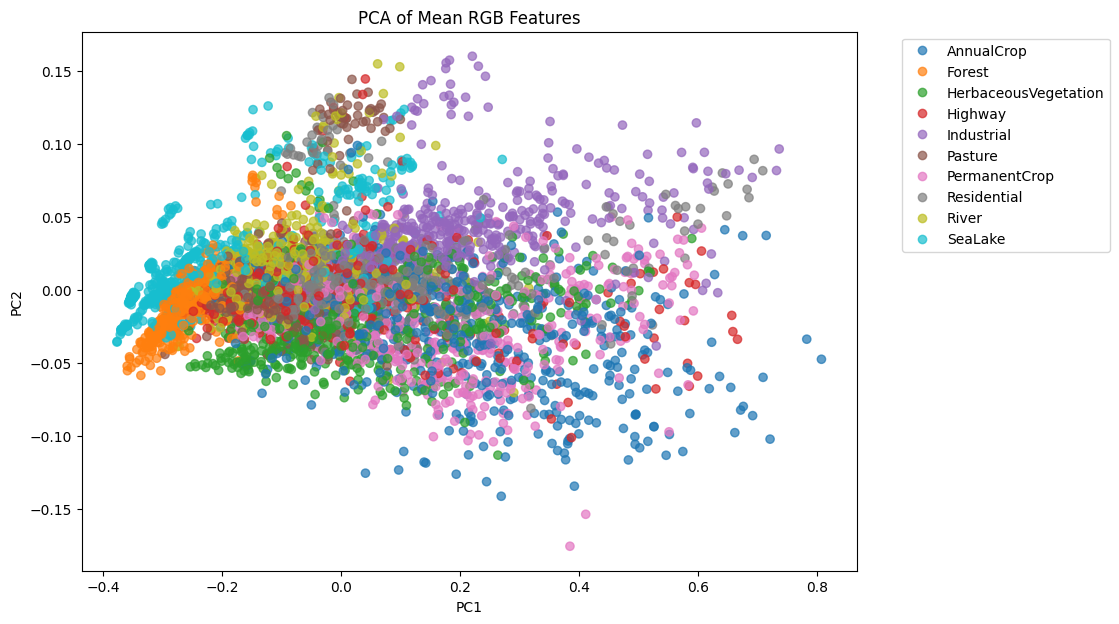

In [9]:
from sklearn.decomposition import PCA

features = []
labels = []

for img, lbl in dataset['train'].take(5000):
    img = img.numpy() / 255.0
    mean_rgb = img.mean(axis=(0,1))
    features.append(mean_rgb)
    labels.append(lbl.numpy())

features = np.array(features)
labels = np.array(labels)

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap="tab10", alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=classes, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA of Mean RGB Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

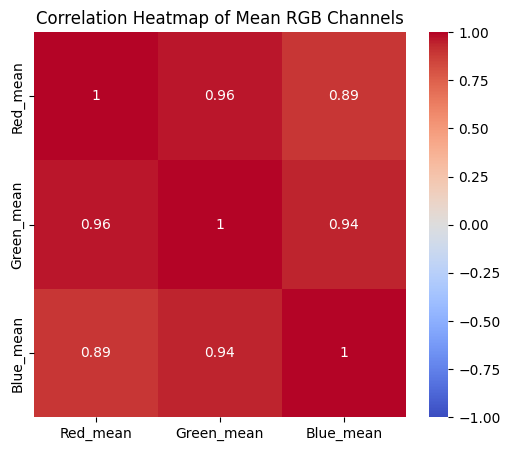

In [10]:
import pandas as pd
import seaborn as sns
df_features = pd.DataFrame(features, columns=["Red_mean", "Green_mean", "Blue_mean"])

corr = df_features.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Mean RGB Channels")
plt.show()